# Anomaly Detection Using Autoendoder

## Credit Card Fraud Dection

### Import Libraries

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow import keras

### Load in Data

In [24]:
df = pd.read_csv('Data/final_cred_data.csv')
df.head()

,Unnamed: 0,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,0,152212.222222,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,1,159074.444444,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,2,43127.777778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,3,156042.222222,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,4,154720.000000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


In [25]:
# Remove `Unnamed: 0` column from df
df.drop("Unnamed: 0", axis=1, inplace=True)

In [26]:
df.head()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.222222,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.444444,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.777778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.222222,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.000000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


### EDA

In [27]:
# Get shape
df.shape

(140000, 15)

In [28]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  140000 non-null  float64
 1   Value      140000 non-null  float64
 2   C1         116232 non-null  float64
 3   C2         129731 non-null  float64
 4   C3         129693 non-null  float64
 5   C4         140000 non-null  float64
 6   C5         129678 non-null  float64
 7   C6         116529 non-null  float64
 8   C7         125595 non-null  float64
 9   C8         129645 non-null  float64
 10  C9         140000 non-null  float64
 11  C10        129891 non-null  float64
 12  C11        125695 non-null  float64
 13  C12        125833 non-null  float64
 14  Class      140000 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 16.0 MB


In [29]:
# View descriptive statistics
df.describe()

,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
count,140000.000000,140000.000000,116232.000000,129731.000000,129693.000000,140000.000000,129678.000000,116529.000000,125595.000000,129645.000000,140000.000000,129891.000000,125695.000000,125833.000000,140000.000000
mean,105334.592698,71.102883,-13.647954,-15.797094,-16.141105,0.000037,-15.540173,-13.681959,-14.760374,-16.067148,0.000119,-16.029764,-15.500080,-15.491673,0.001807
std,52763.641695,212.359700,224.599903,72.631165,74.585111,0.031540,72.120519,230.871123,235.313604,73.148242,0.215636,73.378542,237.289210,236.485713,0.042472
min,0.000000,0.000000,-2000.000000,-500.000000,-500.000000,-0.212540,-500.000000,-2000.000000,-1999.000000,-500.000000,-1.544515,-500.000000,-1998.000000,-2000.000000,0.000000
25%,60107.500000,4.400000,-6.419730,-0.262951,-9.288367,-0.017731,-0.205542,-1.149444,-0.108129,-0.033800,-0.143551,-0.509781,-0.277642,-0.596404,0.000000
50%,94276.111111,17.584000,-1.250014,-0.019520,-1.739613,-0.000140,0.000903,0.279868,0.023023,-0.005629,0.003731,-0.062414,-0.019975,0.007491,0.000000
75%,154845.833333,61.522000,5.063801,0.220734,6.436411,0.017776,0.206203,1.092373,0.109777,0.022194,0.140835,0.327266,0.224548,0.507399,0.000000
max,191985.555556,20552.928000,2000.000000,100.000000,196.401291,0.278668,100.000000,1999.000000,1998.000000,100.000000,0.858579,100.000000,2000.000000,1999.000000,1.000000


In [30]:
# Check balance of the dataset 
df.Class.value_counts()

0    139747
1       253
Name: Class, dtype: int64

In [31]:
# Check nulls
df.isnull().sum()

Timestamp        0
Value            0
C1           23768
C2           10269
C3           10307
C4               0
C5           10322
C6           23471
C7           14405
C8           10355
C9               0
C10          10109
C11          14305
C12          14167
Class            0
dtype: int64

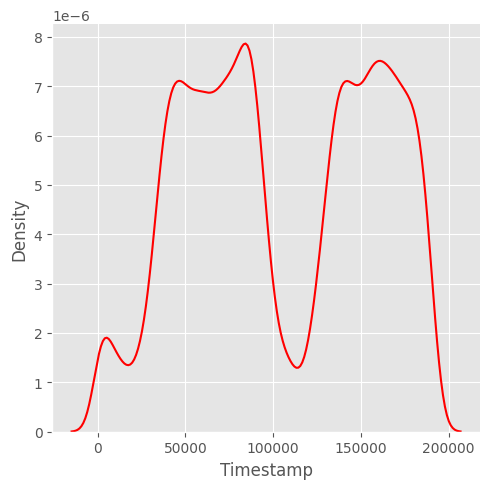

In [32]:
plt.style.use('ggplot')
sns.displot(data=df, x="Timestamp", kind="kde", color="r")

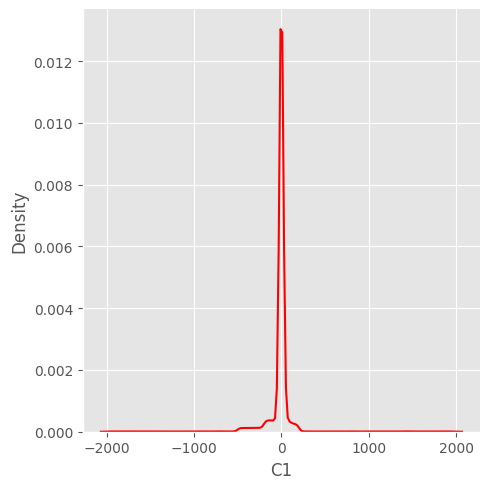

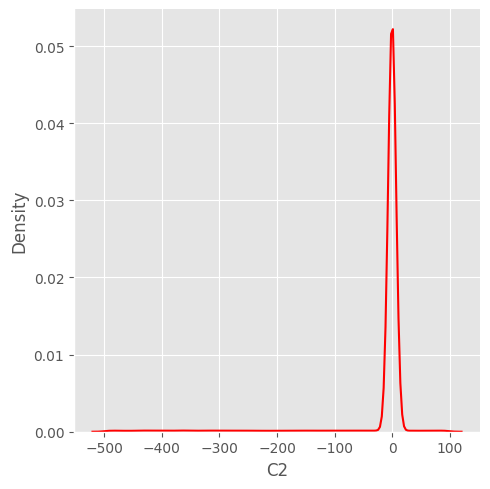

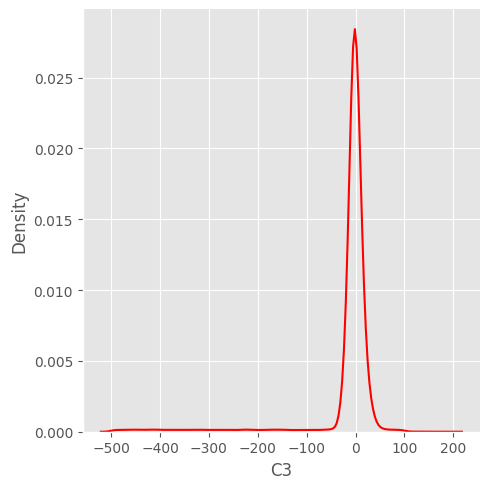

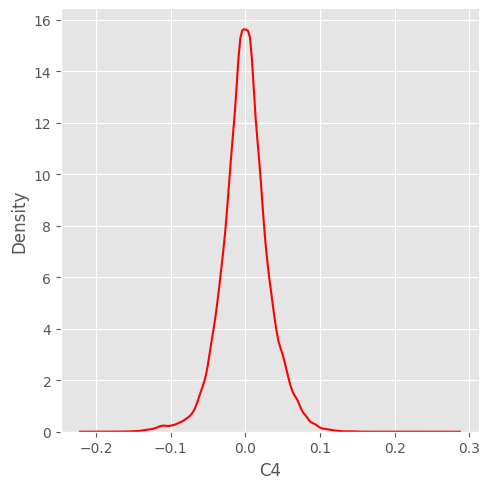

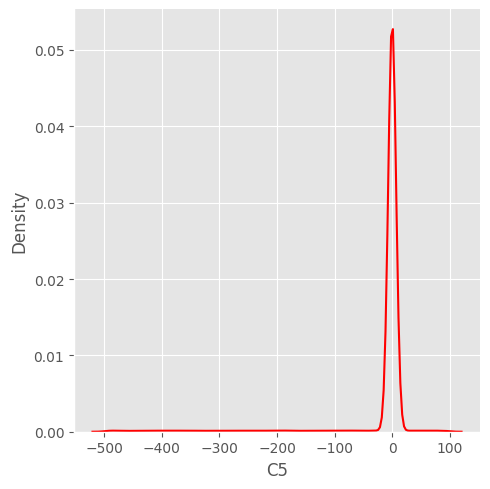

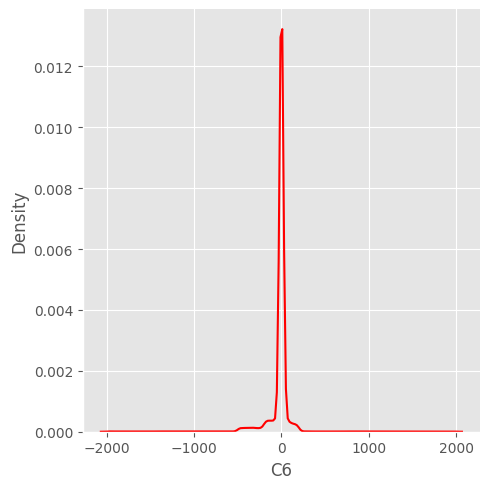

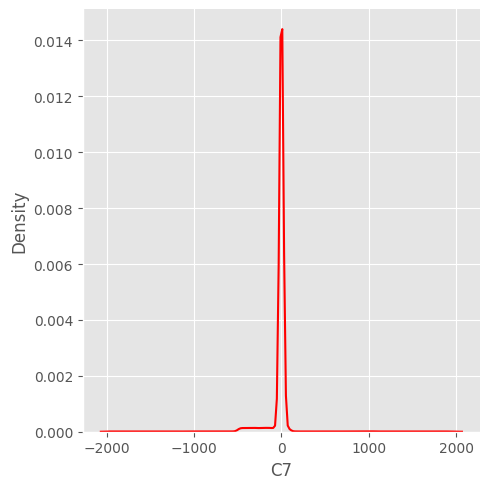

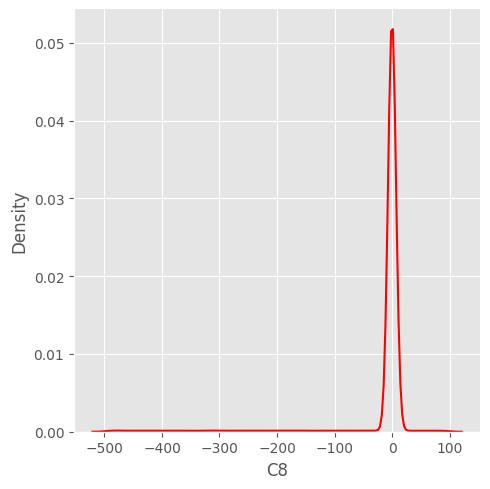

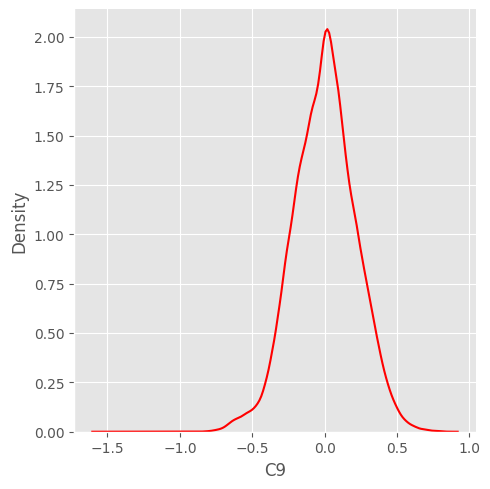

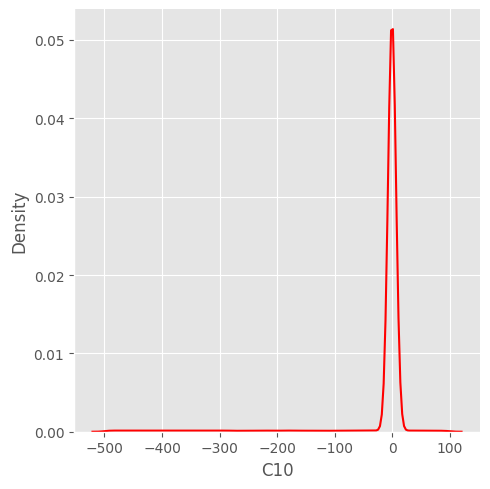

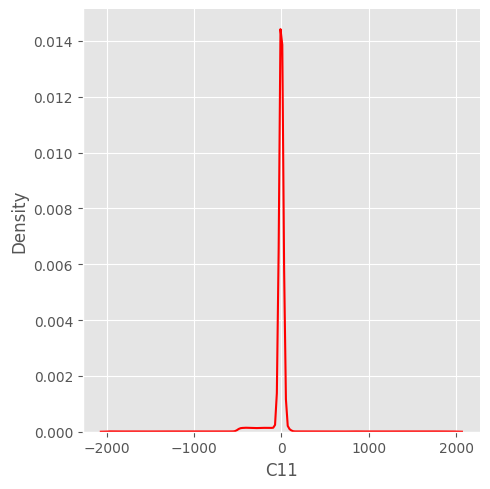

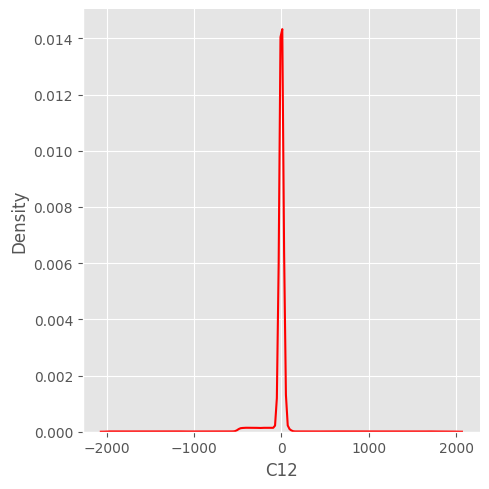

In [33]:

for elem in ['C1','C2','C3','C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']:
    sns.displot(data=df, x=elem, kind="kde", color="r")

### Data Preprocessing

In [34]:
# Impute missing values with mean
df = df.fillna(df.mean())
df.isnull().sum()

Timestamp    0
Value        0
C1           0
C2           0
C3           0
C4           0
C5           0
C6           0
C7           0
C8           0
C9           0
C10          0
C11          0
C12          0
Class        0
dtype: int64

In [35]:
# Drop the timestamp column
df.drop("Timestamp", axis=1, inplace=True)
df.head()

,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,1.816,13.245219,-15.797094,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,-14.760374,0.062966,0.130546,-0.303582,-15.500080,-15.491673,0
2,24.000,-9.067399,0.762501,-16.141105,0.052481,-0.101681,-88.000000,0.117912,-16.067148,0.358812,-0.367016,-15.500080,361.000000,0
3,8.000,8.728304,-0.382673,-16.141105,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,-15.500080,-1.654373,0
4,59.496,7.657141,0.150611,-16.141105,-0.034883,0.826100,0.357556,0.147640,-16.067148,0.080491,-0.693792,-0.308631,0.563570,0


In [98]:
normalized_df = (df - df.min())/(df.max() - df.min())


In [99]:
X_train = normalized_df.drop("Class", axis=1).values
y_train = normalized_df.values

In [100]:
X_train.shape

(140000, 13)

### Build model

In [104]:
model = tf.keras.Sequential([   
    tf.keras.layers.Input(shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(13, activation="relu",),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(X_train.shape[1])
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer)

history = model.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20


2022-11-20 16:36:36.199485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1094/1094 [==============================] - 6s 5ms/step - loss: 0.0120
Epoch 2/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0062
Epoch 3/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0061
Epoch 4/20
1094/1094 [==============================] - 6s 5ms/step - loss: 0.0061
Epoch 5/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0061
Epoch 6/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0061
Epoch 7/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0061
Epoch 8/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0061
Epoch 9/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 10/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0050
Epoch 11/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0050
Epoch 12/20
1094/1094 [==============================] - 5s 5ms/step - loss: 0.0050
Epoch 13/20


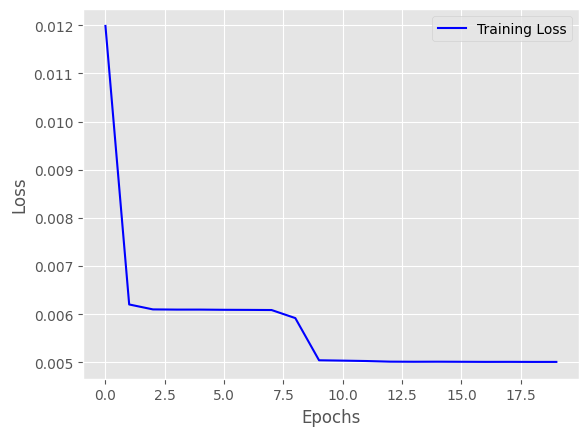

In [105]:
plt.plot(history.history['loss'], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [106]:
y_pred = model.predict(X_train)

  84/4375 [..............................] - ETA: 7s

2022-11-20 16:38:29.684127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4375/4375 [==============================] - 7s 2ms/step


In [107]:
error = np.square(np.subtract(y_pred, X_train)).mean(axis=1)
print(np.square(np.subtract(y_pred, X_train)).mean())

0.005077160933917271


In [108]:
df_error = pd.DataFrame(error, columns=["error"])
df_error

,error
0,0.000760
1,0.014637
2,0.003813
3,0.005974
4,0.000910
...,...
139995,0.000283
139996,0.000520
139997,0.011000
139998,0.000718


In [112]:
model = tf.keras.Sequential([   
    tf.keras.layers.Input(shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(13, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(X_train.shape[1])
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer)

history = model.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20


2022-11-20 16:42:18.102623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1094/1094 [==============================] - 7s 6ms/step - loss: 0.0093
Epoch 2/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 3/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 4/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0020
Epoch 5/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0019
Epoch 6/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 7/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 8/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 9/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 10/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 11/20
1094/1094 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 12/20
1094/1094 [==============================] - 6s 6ms/step - loss: 0.0018
Epoch 13/20


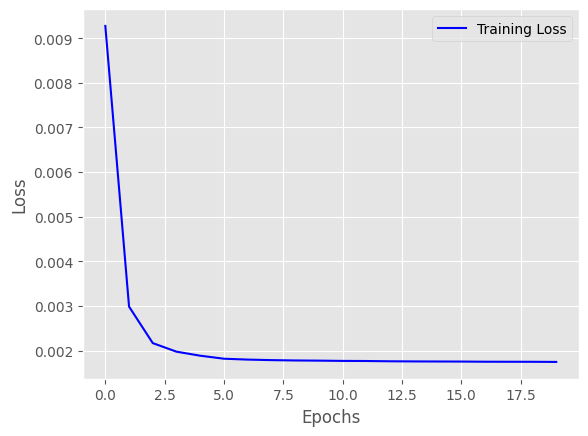

In [114]:
plt.plot(history.history['loss'], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


In [121]:
y_pred = model.predict(X_train)

  83/4375 [..............................] - ETA: 7s

2022-11-20 16:45:53.528929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4375/4375 [==============================] - 7s 2ms/step


In [122]:
error = np.square(np.subtract(y_pred, X_train)).mean(axis=1)
print(np.square(np.subtract(y_pred, X_train)).mean())

0.001735206622808545


In [123]:
df_error = pd.DataFrame(error, columns=["error"])
df_error.head()

,error
0,0.000608
1,0.000190
2,0.001493
3,0.005516
4,0.000634


In [124]:
final_df = pd.concat([df.reset_index(drop=True), df_error.reset_index(drop=True)], axis=1)

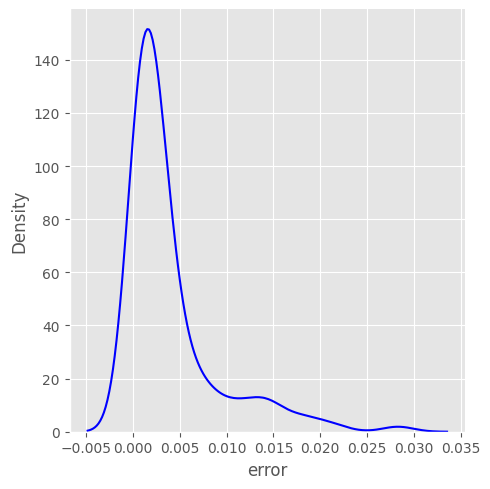

In [131]:
sns.displot(data=final_df, x=final_df[final_df.Class==1].error, kind="kde", color="b")

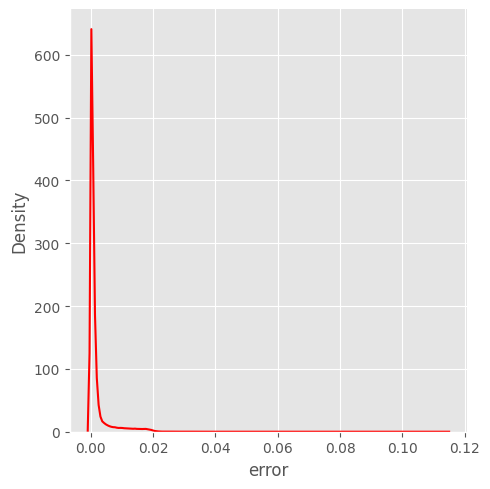

In [130]:
sns.displot(data=final_df, x=final_df[final_df.Class==0].error, kind="kde", color="r")

<AxesSubplot: ylabel='Density'>

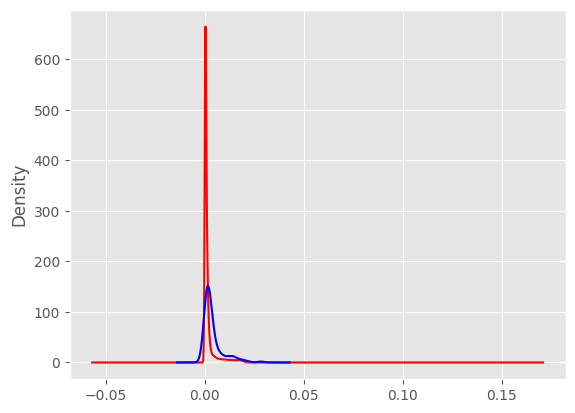

In [129]:
final_df[final_df.Class==0].error.plot.kde(color="r")
final_df[final_df.Class==1].error.plot.kde(color="b")